**Training an Intrusion Detection System with KDD99 Dataset**

In [3]:
import pandas as pd

df = pd.read_csv(r"E:\HocKi5\HeThongTimKiemPhatHienVaNganNguaXamNhap\KDDCup99.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


**Analyzing the Dataset**

In [4]:
df['service'].value_counts()

ecr_i      281400
private    110893
http        64292
smtp         9723
other        7237
            ...  
X11            11
tim_i           7
pm_dump         1
tftp_u          1
red_i           1
Name: service, Length: 66, dtype: int64

In [5]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64

In [6]:
label_mapping = {'tcp': 0, 'udp': 1, 'icmp': 2}
df['protocol_type'] = df['protocol_type'].replace(label_mapping)

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
on=LabelEncoder()
df['service'] = on.fit_transform(df['service'])
df['flag'] = on.fit_transform(df['flag'])
df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,11
1,0,0,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,11
2,0,0,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11
3,0,0,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,11
4,0,0,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,11


In [8]:
df = pd.DataFrame(df)

In [9]:
# Data Cleaning

# Checking for NULL values
print('Null values in dataset are',len(df[df.isnull().any(1)]))
print('='*40)

# Checkng for DUPLICATE values
df.drop_duplicates(keep='first', inplace = True)

# For now, just drop NA's (rows with missing values)
df.dropna(inplace=True,axis=1)

# stored the data into a pickle file so we can load through
# df.to_pickle('df.pkl')

print("Read {} rows.".format(len(df)))

C:\Users\dinh kha\AppData\Local\Temp\ipykernel_3676\2342998065.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print('Null values in dataset are',len(df[df.isnull().any(1)]))


Null values in dataset are 0
Read 145585 rows.


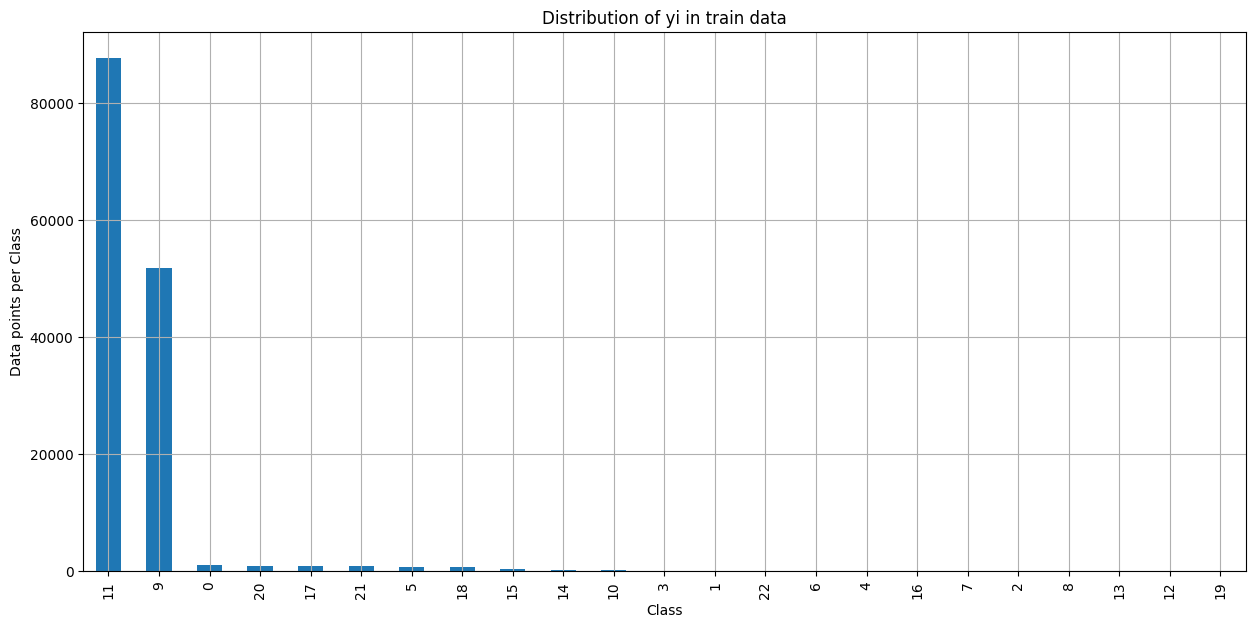

In [10]:
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(15,7))
class_distribution = df['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

In [11]:
import pandas as pd
import os
import numpy as np
from sklearn import metrics
from scipy.stats import zscore

**Encode the feature vector**

**Train the Neural Network**

In [12]:
X = df.iloc[:, :-1].values  # EEG data
Y = df.iloc[:, -1].values   # Mental health labels

X = StandardScaler().fit_transform(X)
Y = LabelEncoder().fit_transform(Y)

In [13]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics




x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42)

In [ ]:
# class EarlyStoppingByAccuracy:
#     def __init__(self, monitor='val_acc', value=0.95, verbose=0):
#         self.monitor = monitor
#         self.value = value
#         self.verbose = verbose
#         self.best_model = None

#     def on_epoch_end(self, epoch, logs={}):
#         current_value = logs.get(self.monitor)
#         if current_value is not None:
#             if current_value >= self.value:
#                 if self.verbose:
#                     print(f"Epoch {epoch + 1}: Early stopping (reached {self.monitor} >= {self.value})")
#                 self.model.stop_training = True
#                 self.best_model = clone(self.model)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import numpy as np
import warnings

# Thiết lập các tham số cần tối ưu hóa
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Tạo mô hình SVM
svm_model = SVC(verbose=3)

# Sử dụng GridSearchCV để tìm các tham số tốt nhất và early stopping
grid_search = GridSearchCV(svm_model, param_grid, cv=2)
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    grid_search.fit(x_train, y_train)

# In ra các tham số tốt nhất
print("Best parameters found: ", grid_search.best_params_)

# Sử dụng mô hình tốt nhất để dự đoán trên tập kiểm tra
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# In ra báo cáo chi tiết
print("Classification Report:\n", classification_report(y_test, y_pred))


[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Best parameters found:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 99.79%
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       245
           1       1.00      0.50      0.67         4
           2       0.00      0.00      0.00         3
           3       1.00      0.94      0.97        18
           4       1.00      1.00      1.00         1
           5       0.97      0.97      0.97       177
           6       1.00      1.00      1.00         4
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     12973
          10       0.91      0.70      0.79        43

c:\Users\dinh kha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dinh kha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dinh kha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf